---

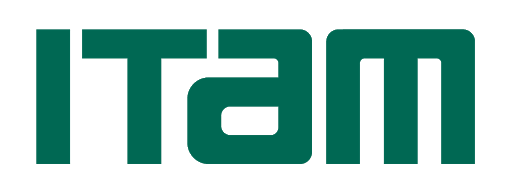

In [54]:
# Inicio de M para usuarios.
from IPython.core.display import Image, display
from tqdm import tqdm
display(Image('C:/Users/DANIEL/Documents/ITAM/Diplomado/04_Machine_Learning/logo_itam.png', width=700, unconfined=True))

---

<font color='#508072'> 
$ \Large \textbf {Data science and machine learning applied to financial markets} $

<font color='#508072'> 
$ \normalsize \textbf {Author: Daniel Omar Becerril Olguín} $

<font color='#508072'> 
$ \normalsize \textbf {CU: 183605} $

---

# Prerequisites

In [40]:
#Import libraries

import numpy as np
from numpy.random import uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate
import plotly.express as px
from sklearn.model_selection import GridSearchCV


---

<h1 style="color:crimson">Tarea</h1>

* Entrenar un modelo Lasso con GridSearchCV usando un pipeline de polinomios de segundo grado
* Graficar coeficientes "significativos"
* Revisar cuantos parámetros son mayores a 1e-2

**Solución :**

In [41]:
#Importa datos
ipc_path = "C:/Users/DANIEL/Documents/ITAM/Diplomado/04_Machine_Learning/ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [42]:
Rmkt = market.pct_change().dropna()

Xall = Rmkt.drop("MEXBOL INDEX", axis=1)
Xall = Xall.join(Rmkt["MEXBOL INDEX"].shift(1)).dropna()

Xtrain = Xall.drop("MEXBOL INDEX", axis=1)
ytrain = Xall["MEXBOL INDEX"]

In [43]:
#Divide en test & train
test_period = "2019-12"
Xtest, ytest = Xtrain[test_period:], ytrain[test_period:]
Xtrain, ytrain = Xtrain[:"2019-11":], ytrain[:"2019-11"]

## Modelo

In [44]:
#Genera arreglo de alphas
alpha_list = uniform(0.1, 1, 300)

#Grado del polinomio
gdo_polinomio = 2

#Genera modelo
lasso_pipe = Pipeline([
    ("poly", PolynomialFeatures(gdo_polinomio)),
    ("lasso", Lasso())
])

grid = {
    "lasso__alpha": alpha_list
}

In [45]:
# Inicializando el modelo
gsearch = GridSearchCV(lasso_pipe, grid, scoring="r2")
gsearch.fit(Xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              wa...
       0.7

In [46]:
Xtrain.columns

Index(['KIMBERA MF Equity', 'GAPB MF Equity', 'CEMEXCPO MF Equity',
       'ASURB MF Equity', 'GFNORTEO MF Equity', 'KOFUBL MF Equity',
       'AC* MF Equity', 'LABB MF Equity', 'FEMSAUBD MF Equity',
       'OMAB MF Equity', 'GFINBURO MF Equity', 'AMXL MF Equity',
       'ALSEA* MF Equity', 'ORBIA* MF Equity', 'PE&OLES* MF Equity',
       'GRUMAB MF Equity', 'RA MF Equity', 'WALMEX* MF Equity',
       'BOLSAA MF Equity', 'LIVEPOLC MF Equity', 'GENTERA* MF Equity',
       'IENOVA* MF Equity', 'CUERVO* MF Equity', 'ELEKTRA* MF Equity',
       'BBAJIOO MF Equity', 'ALPEKA MF Equity', 'MEGACPO MF Equity',
       'GCC* MF Equity', 'BIMBOA MF Equity', 'GMEXICOB MF Equity',
       'GCARSOA1 MF Equity', 'TLEVICPO MF Equity', 'ALFAA MF Equity',
       'BSMXB MF Equity', 'PINFRA* MF Equity'],
      dtype='object')

In [47]:
print("COeficient:",len(gsearch.best_estimator_.named_steps['lasso'].coef_.reshape(-1, 1)))

print("Intercept: ",len(gsearch.best_estimator_.named_steps['lasso'].intercept_.reshape(-1, 1)))

print("Entrenamiento: ",len(Xtrain))

print("Test: ",len(Xtest))

COeficient: 666
Intercept:  1
Entrenamiento:  646
Test:  25


In [48]:
res = pd.Series(gsearch.best_estimator_.named_steps['lasso'].coef_[:35], Xtrain.columns)
res = res.reset_index().rename({"index": "asset", 0: "value"}, axis=1)

In [49]:
px.bar(res, x="asset", y="value")

Ninguno me salió mayor a 1e^2